In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("spam.csv")
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.shape

(5572, 2)

In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [7]:
df['Category'] = encoder.fit_transform(df['Category'])

In [8]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#Data Cleaning

In [10]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(415)

In [12]:
df = df.drop_duplicates(keep='first')

In [13]:
df.duplicated().sum()

np.int64(0)

In [14]:
#EDA

In [15]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df["Category"].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x1b2fe5ada90>,
 [Text(-1.0171946362150524, 0.41870642705280725, 'ham'),
  Text(1.0171945729921292, -0.4187065806449194, 'spam')],
 [Text(-0.554833437935483, 0.22838532384698573, '87.57'),
  Text(0.5548334034502522, -0.22838540762450146, '12.43')])

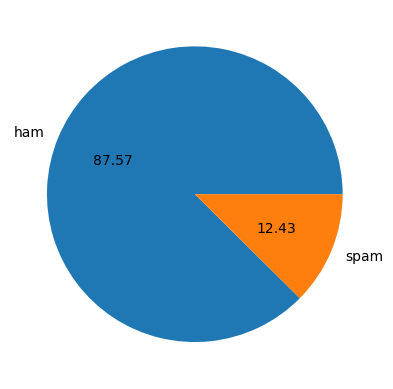

In [17]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(), labels=['ham', 'spam'], autopct="%0.2f")

In [18]:
#data is imbalanced

In [19]:
import nltk

In [20]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\akars\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [21]:
df["num_characters"] = df['Message'].apply(len)

In [22]:
df.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [23]:
df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df.head()

,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [25]:
df['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [26]:
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [27]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['Category']==0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [29]:
df[df['Category']==1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [30]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

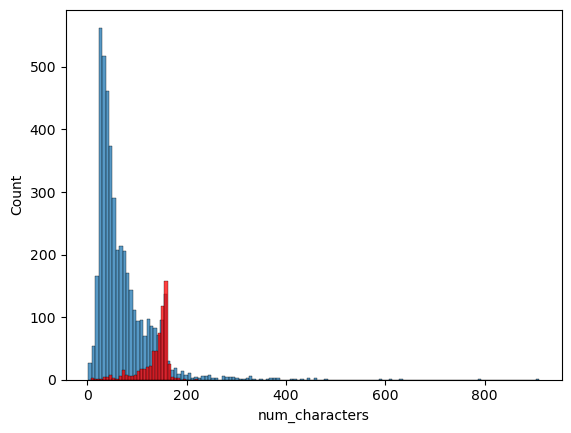

In [31]:
sns.histplot(df[df['Category'] == 0]['num_characters'])
sns.histplot(df[df['Category'] == 1]['num_characters'], color='red')

<Axes: xlabel='num_words', ylabel='Count'>

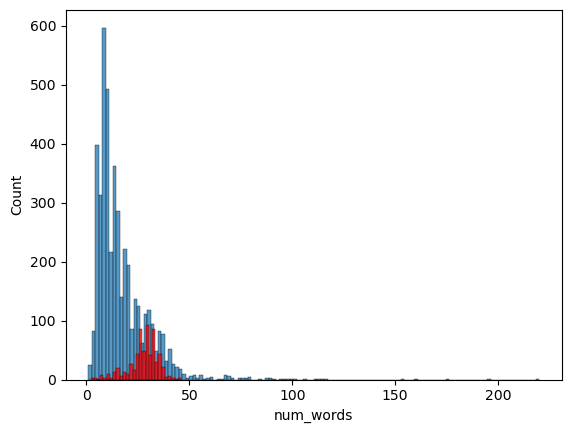

In [32]:
sns.histplot(df[df['Category'] == 0]['num_words'])
sns.histplot(df[df['Category'] == 1]['num_words'], color='red')

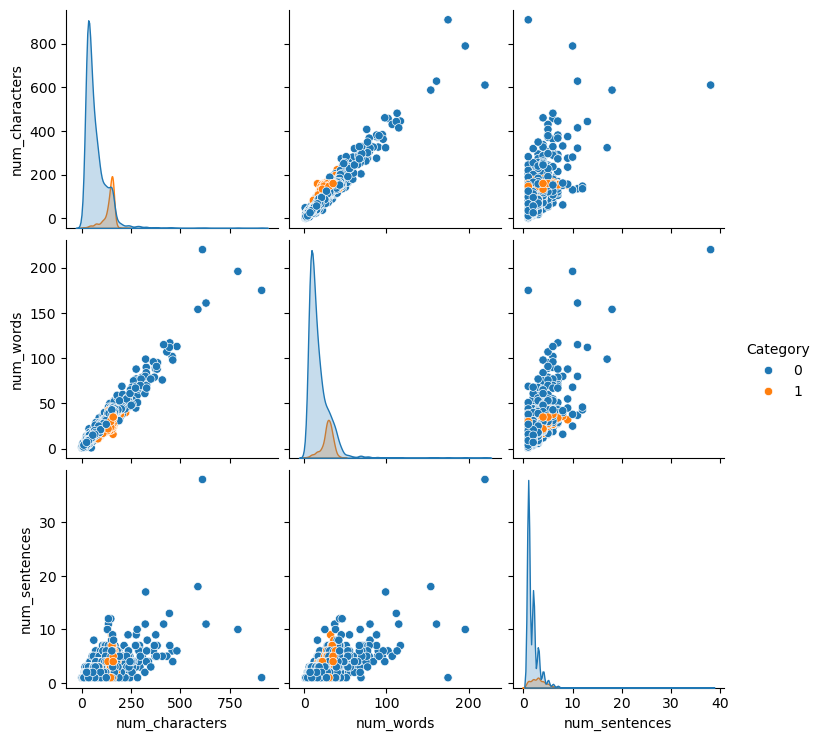

In [33]:
sns.pairplot(df, hue='Category')

In [34]:
df.columns

Index(['Category', 'Message', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

<Axes: >

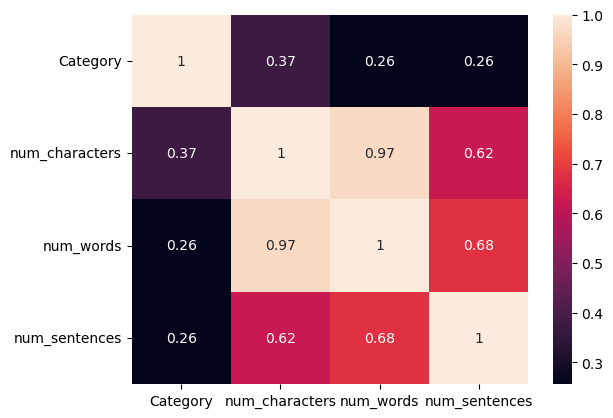

In [35]:
sns.heatmap(df[['Category', 'num_characters', 'num_words', 'num_sentences']].corr(), annot=True)

In [36]:
# data preprocessing
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akars\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
# nltk.download('stopwords')
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(Message):
    Message = Message.lower()
    Message = nltk.word_tokenize(Message)

    y = []
    for i in Message:
        if i.isalnum():
            y.append(i)

    Message = y[:]
    y.clear()

    for i in Message:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    Message = y[:]
    y.clear()

    for i in Message:
        y.append(ps.stem(i))
    return  " ".join(y)

In [38]:
print(transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."))

gon na home soon want talk stuff anymor tonight k cri enough today


In [39]:
#stopwords.words('english')

In [40]:
#df['Message'][10]

In [41]:
df['transformed_message'] = df["Message"].apply(transform_text)

In [42]:
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_message
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
!pip install wordcloud

In [44]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [45]:
spam_wc = wc.generate(df[df['Category'] == 1]['transformed_message'].str.cat(sep=" "))

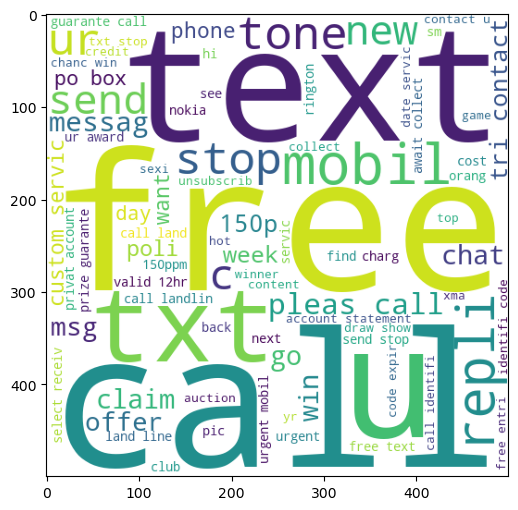

In [46]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [47]:
ham_wc = wc.generate(df[df['Category'] == 0]['transformed_message'].str.cat(sep=" "))

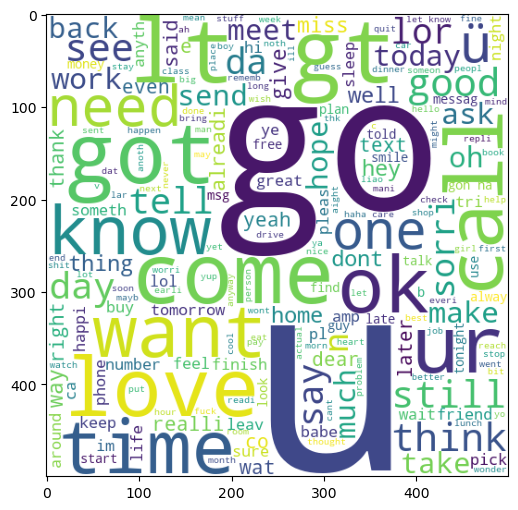

In [48]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [49]:
spam_corpus = []
for msg in df[df['Category'] == 1]['transformed_message'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [50]:
len(spam_corpus)

9781

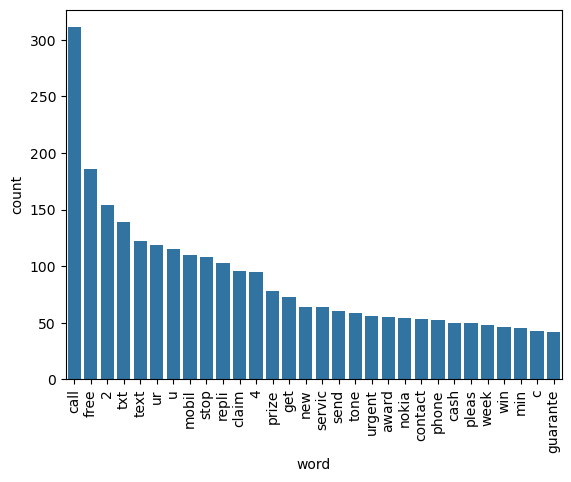

In [51]:
from collections import Counter
most_common_words = pd.DataFrame(Counter(spam_corpus).most_common(30), 
                                columns=['word', 'count'])

sns.barplot(x='word', y='count', data=most_common_words)

plt.xticks(rotation='vertical')
plt.show()

In [52]:
ham_corpus = []
for msg in df[df['Category'] == 0]['transformed_message'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [53]:
len(ham_corpus)

35940

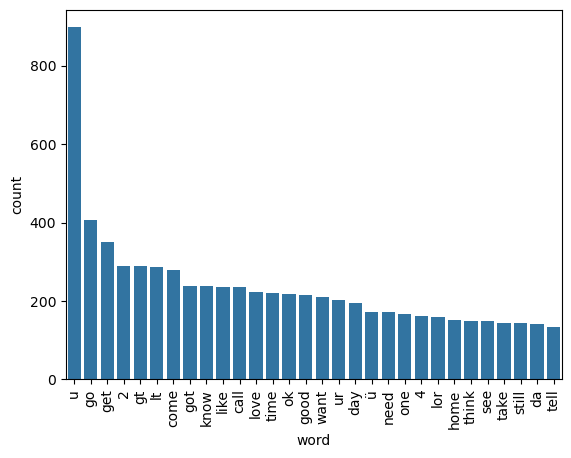

In [54]:
from collections import Counter
most_common_words = pd.DataFrame(Counter(ham_corpus).most_common(30), 
                                columns=['word', 'count'])

sns.barplot(x='word', y='count', data=most_common_words)

plt.xticks(rotation='vertical')
plt.show()

In [55]:
#Model Building

In [111]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [112]:
X = tfidf.fit_transform(df["transformed_message"]).toarray()

In [113]:
X.shape

(5157, 3000)

In [59]:
y = df['Category'].values

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [62]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, CategoricalNB,ComplementNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [63]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()
canb =  CategoricalNB()
conb = ComplementNB()

In [64]:
# gnb.fit(X_train, y_train)
# y_pred1 = gnb.predict(X_test)
# print(accuracy_score(y_test,y_pred1))
# print(confusion_matrix(y_test,y_pred1))
# print(precision_score(y_test,y_pred1))

0.8817829457364341
[[789 107]
 [ 15 121]]
0.5307017543859649


In [65]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9777131782945736
[[896   0]
 [ 23 113]]
1.0


In [66]:
# bnb.fit(X_train, y_train)
# y_pred3 = bnb.predict(X_test)
# print(accuracy_score(y_test,y_pred3))
# print(confusion_matrix(y_test,y_pred3))
# print(precision_score(y_test,y_pred3))

0.9854651162790697
[[894   2]
 [ 13 123]]
0.984


In [67]:
# conb.fit(X_train, y_train)
# y_pred4 = conb.predict(X_test)
# print(accuracy_score(y_test,y_pred4))
# print(confusion_matrix(y_test,y_pred4))
# print(precision_score(y_test,y_pred4))

0.9282945736434108
[[827  69]
 [  5 131]]
0.655


In [68]:
#tfidf---->mnb

In [95]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.ensemble import BaggingClassifier
# from sklearn.ensemble import ExtraTreesClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from xgboost import XGBClassifier

In [96]:
# svc = SVC(kernel='sigmoid', gamma=1.0)
# knc = KNeighborsClassifier()
mnb = MultinomialNB()
# dtc = DecisionTreeClassifier(max_depth=5)
# lrc = LogisticRegression(solver='liblinear', penalty='l1')
# rfc = RandomForestClassifier(n_estimators=50, random_state=2)
# abc = AdaBoostClassifier(n_estimators=50, random_state=2)
# bc = BaggingClassifier(n_estimators=50, random_state=2)
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
# gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
# xgb = XGBClassifier(n_estimators=50,random_state=2)

In [97]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [98]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [99]:
train_classifier(mnb, X_train, y_train, X_test, y_test)

(0.9777131782945736, 1.0)

In [100]:
# accuracy_scores = []
# precision_scores = []

# for name,clf in clfs.items():

#     current_accuracy, current_precision = train_classifier(clf, X_train, y_train, X_test, y_test)

#     print('For', name)
#     print("Accuracy - ", current_accuracy)
#     print("Precision - ", current_precision)

#     accuracy_scores.append(current_accuracy)
#     precision_scores.append(current_precision)

In [75]:
# performance_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy':accuracy_scores, "Precision":precision_scores}).sort_values('Precision', ascending=False)

In [76]:
# performance_df

,Algorithm,Accuracy,Precision
1,KN,0.912791,1.000000
2,NB,0.977713,1.000000
8,ETC,0.979651,0.983193
5,RF,0.977713,0.982906
0,SVC,0.976744,0.951613
9,GBDT,0.954457,0.940594
10,xgb,0.970930,0.920635
4,LR,0.951550,0.890909
7,BgC,0.964147,0.861314
3,DT,0.941860,0.851852


In [77]:
# performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [78]:
# performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.912791
1,NB,Accuracy,0.977713
2,ETC,Accuracy,0.979651
3,RF,Accuracy,0.977713
4,SVC,Accuracy,0.976744
5,GBDT,Accuracy,0.954457
6,xgb,Accuracy,0.970930
7,LR,Accuracy,0.951550
8,BgC,Accuracy,0.964147
9,DT,Accuracy,0.941860


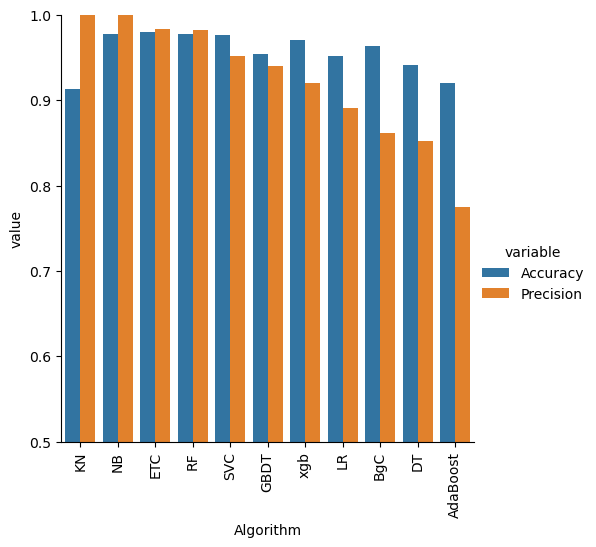

In [79]:
# sns.catplot(x = 'Algorithm', y = "value", hue = 'variable', data=performance_df1, kind='bar', height=5)
# plt.ylim(0.5,1.0)
# plt.xticks(rotation='vertical')
# plt.show()

In [80]:
#model improvements
#changing the max_features parameter of tfidf

In [81]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_max_ft_3000':accuracy_scores, 'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [101]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(), 'Accuracy_scaling':accuracy_scores, 'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False) 

In [102]:
# new_df = performance_df.merge(temp_df,on='Algorithm')

In [103]:
# new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [85]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [104]:
# new_df_scaled.merge(temp_df,on='Algorithm')

In [87]:
#Voting CLassifier
# # svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
# mnb = MultinomialNB()
# etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

# from sklearn.ensemble import VotingClassifier

In [88]:
# voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [105]:
# voting.fit(X_train,y_train)

In [106]:

# y_pred = voting.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [107]:
# Applying stacking
# /estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
# final_estimator=RandomForestClassifier()

In [108]:
# from sklearn.ensemble import StackingClassifier

In [109]:
# clf.fit(X_train,y_train)
# y_pred = clf.predict(X_test)
# print("Accuracy",accuracy_score(y_test,y_pred))
# print("Precision",precision_score(y_test,y_pred))

In [110]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))